In [30]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib
%matplotlib inline

In [31]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
#dataset = pd.read_csv(url, names=names)   # Only attributes in names will read
#dataset.head()

In [32]:
data=pd.read_csv("D:\Practice\Iris\Data\iris.csv")

In [33]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [37]:
data=data.drop('Id',axis=1)

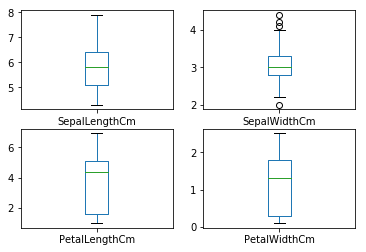

In [38]:
data.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

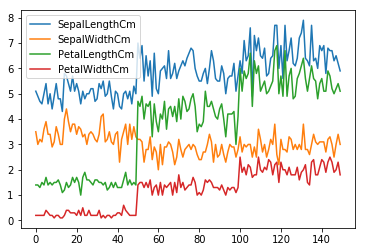

In [39]:
data.plot()
plt.show()

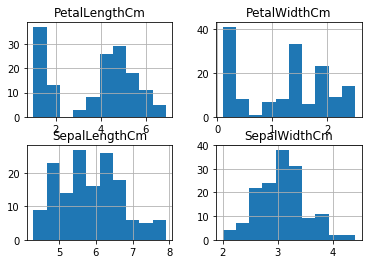

In [40]:
data.hist()
plt.show()

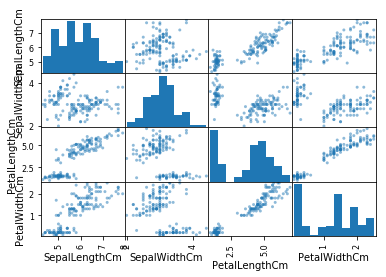

In [41]:
scatter_matrix(data)
plt.show()

In [42]:
array=data.values
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [43]:
x=array[:,0:4]
y=array[:,4]
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3.0, 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5.0, 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5.0, 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3.0, 1.4, 0.1],
        [4.3, 3.0, 1.1, 0.1],
        [5.8, 4.0, 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1.0, 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5.0, 3.0, 1.6, 0.2],
        [5.0, 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [44]:
validation_size=0.2
seed=7

In [45]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

In [46]:
x_test.shape

(30, 4)

In [47]:
scoring='accuracy'

In [48]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=kfold, scoring=scoring)

In [49]:
cv_results=model_selection.cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=kfold,scoring=scoring)

In [50]:
cv_results

array([0.91666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 0.91666667, 1.        ])

In [51]:
results=[]
results.append(cv_results)

In [52]:
names.append('DecisionTreeClassifier')

In [53]:
names

['sepal-length',
 'sepal-width',
 'petal-length',
 'petal-width',
 'Species',
 'DecisionTreeClassifier']

In [54]:
msg="%s:%f(%f)"%('DecisionTreeClassifier',cv_results.mean(), cv_results.std())
print(msg)

DecisionTreeClassifier:0.975000(0.038188)


In [55]:
dtc=DecisionTreeClassifier()
iris_train=dtc.fit(x_train,y_train)

In [56]:
predictions=dtc.predict(x_test)

In [57]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]


In [58]:
iris_train.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)

In [59]:
joblib.dump(dtc,'Iris_decision.pkl')

['Iris_decision.pkl']